In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [17]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

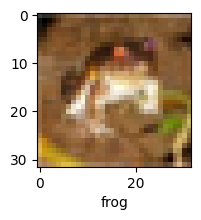

In [19]:
plot_sample(X_train,y_train,0)

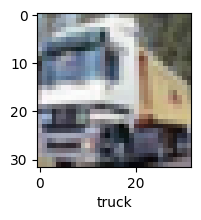

In [20]:
plot_sample(X_train, y_train, 1)

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
from tensorflow.keras import models, layers, Input

ann = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 93ms/step - accuracy: 0.3076 - loss: 1.9338
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.4172 - loss: 1.6474
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - accuracy: 0.4496 - loss: 1.5497
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - accuracy: 0.4759 - loss: 1.4891
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 123ms/step - accuracy: 0.4932 - loss: 1.4330


In [20]:
import sklearn


from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 106ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.80      0.49      1000
           1       0.54      0.72      0.61      1000
           2       0.49      0.13      0.20      1000
           3       0.39      0.20      0.26      1000
           4       0.45      0.42      0.43      1000
           5       0.32      0.51      0.40      1000
           6       0.46      0.67      0.54      1000
           7       0.67      0.40      0.50      1000
           8       0.81      0.29      0.43      1000
           9       0.62      0.43      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.44     10000
weighted avg       0.51      0.46      0.44     10000



In [21]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\anjal\OneDrive\Documents\Deep-learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 248s 150ms/step - accuracy: 0.3729 - loss: 1.7190
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.5917 - loss: 1.1584
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.6518 - loss: 1.0065
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 105ms/step - accuracy: 0.6797 - loss: 0.9135
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 112ms/step - accuracy: 0.7075 - loss: 0.8351
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 224s 141ms/step - accuracy: 0.7276 - loss: 0.7785
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 166s 106ms/step - accuracy: 0.7453 - loss: 0.7333
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 131ms/step - accuracy: 0.7537 - loss: 0.7003
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.7713 - loss: 0.6570
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 89ms/step - accuracy: 0.7830 - loss: 0.6195


In [3]:
 cnn.evaluate(X_test, y_test)

NameError: name 'cnn' is not defined

In [1]:
y_pred = cnn.predict(X_test)
y_pred[:5]

NameError: name 'cnn' is not defined

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
 y_test = y_test.reshape(-1,)
 y_test[:5]

In [ ]:
plot_sample(X_test, y_test, 3)

In [ ]:
classes[y_classes[3]]

In [ ]:
classes[y_classes[3]]